# Empirical data: evaluate analyses

We have previously analyzed empirical datasets with CCA and PLS. Here, we illustrate the outcomes.

*Note:* These empirical datasets are not included in this release.

## Setup

In [1]:
import os

import numpy as np
import xarray as xr
import pandas as pd

import scipy.stats

import pickle

# from gemmr.sample_analysis.macros import *

# NOTE: The figures in this notebook can be generated with matplotlib==3.1.3, 
# but for some reason aren't rendered correctly with newer versions of matplotlib
import matplotlib
import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')
hv.renderer('matplotlib').param.set_param(dpi=120)

from matplotlib.font_manager import FontProperties

from my_config import *

import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.simplefilter('ignore', MatplotlibDeprecationWarning)
warnings.filterwarnings(
    'ignore', 'aspect is not supported for Axes with xscale=log, yscale=linear', category=UserWarning
)  # holoviews emits this for log-linear plots

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
clr_cca2 = 'firebrick'
clr_pls2 = 'steelblue'

clr_cca3 = 'coral'
clr_pls3 = 'slateblue'

clr_cca4 = 'goldenrod'
clr_pls4 = 'mediumseagreen'

clr_perm1 = 'dimgrey'
clr_perm2 = 'black'

In [4]:
# Will be populated in the following and then saved to disk
plotted_data = {}

In [5]:
hcp_fMRI_cca_analyses = dict(
    full_sample=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2_noz_cca_fullsample.nc')),
    subsampled=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2_noz_cca_subsampled.nc')),
    full_sample_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc_noN2_noz_cca_fullsample_brief.nc')),
    subsampled_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc_noN2_noz_cca_subsampled_brief.nc'))
)

hcp_fMRI_pls_analyses = dict(
    full_sample=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2_noz_pls_fullsample.nc')),
    subsampled=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2_noz_pls_subsampled.nc')),
    full_sample_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc_noN2_noz_pls_fullsample_brief.nc')),
    subsampled_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc_noN2_noz_pls_subsampled_brief.nc'))
)

In [7]:
hcp_dMRI_cca_analyses = dict(
    full_sample=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-dmri-smithpreproc_noz_cca_fullsample.nc')),
    subsampled=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-dmri-smithpreproc_noz_cca_subsampled.nc')),
    # full_sample_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-dmri-smithpreproc_noz_cca_fullsample_brief.nc')),
    # subsampled_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-dmri-smithpreproc_noz_cca_subsampled_brief.nc'))
)

hcp_dMRI_pls_analyses = dict(
    full_sample=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-dmri-smithpreproc_noz_pls_fullsample.nc')),
    subsampled=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-dmri-smithpreproc_noz_pls_subsampled.nc')),
    # full_sample_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-dmri-smithpreproc_noz_pls_fullsample_brief.nc')),
    # subsampled_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-dmri-smithpreproc_noz_pls_subsampled_brief.nc'))
)

In [8]:
ukb_fMRI_cca_analyses = dict(
    full_sample=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/ukb-fmri-smithpreproc-noN2_noz_cca_fullsample.nc')),
    subsampled=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/ukb-fmri-smithpreproc-noN2_noz_cca_subsampled.nc')),
    full_sample_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/ukb-fmri-smithpreproc_noN2_noz_cca_fullsample_brief.nc')),
    subsampled_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/ukb-fmri-smithpreproc_noN2_noz_cca_subsampled_brief.nc'))
)

ukb_fMRI_pls_analyses = dict(
    full_sample=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/ukb-fmri-smithpreproc-noN2_noz_pls_fullsample.nc')),
    subsampled=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/ukb-fmri-smithpreproc-noN2_noz_pls_subsampled.nc')),
    full_sample_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/ukb-fmri-smithpreproc_noN2_noz_pls_fullsample_brief.nc')),
    subsampled_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/ukb-fmri-smithpreproc_noN2_noz_pls_subsampled_brief.nc'))
)

In [9]:
hcp_fMRI_optiNpcs_cca_analyses = dict(
    full_sample=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2-optiNpcs_noz_cca_fullsample.nc')),
    subsampled=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2-optiNpcs_noz_cca_subsampled.nc')),
    # full_sample_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2-optiNpcs_noz_cca_fullsample_brief.nc')),
    # subsampled_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2-optiNpcs_noz_cca_subsampled_brief.nc'))
)

hcp_fMRI_optiNpcs_pls_analyses = dict(
    full_sample=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2-optiNpcs_noz_pls_fullsample.nc')),
    subsampled=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2-optiNpcs_noz_pls_subsampled.nc')),
    # full_sample_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2-optiNpcs_noz_pls_fullsample_brief.nc')),
    # subsampled_brief=xr.open_dataset(os.path.expanduser('~/gemmr_data/empirical/hcp-fmri-smithpreproc-noN2-optiNpcs_noz_pls_subsampled_brief.nc'))
)

## Plotting functions

In [10]:
class Artist_edgecolor:
    def __init__(self, color):
        self.color = color
    def __call__(self, plot, element):
        artist = plot.handles['artist']
        artist.set_edgecolor(self.color)
        artist.set_linewidth(1.5)
        

def plot_assocs_w_perm(analysis_results, qs=(.025, .975), y_label='y', color='steelblue', 
                       color_perm=None, x_max=None, y_scale=1, cv=None, show_pvalue=False,
                       pvalue_deltay=0, plotted_data=None, panel_label=None):
    
    n = analysis_results['full_sample'].attrs['n_samples']
    p_tot = len(analysis_results['full_sample'].x_feature) + len(analysis_results['full_sample'].y_feature)
    
    ds = analysis_results['full_sample']
    ds_subsampled = analysis_results['subsampled']
    p_value = float(analysis_results['full_sample']['p_value'])
    
    between_assocs_perm_q = ds.between_assocs_perm.quantile(qs, 'perm')
    
    subsampled_between_assocs_mean = ds_subsampled.between_assocs.mean('rep').mean('splithalf')
    
    subsampled_between_assocs_q = ds_subsampled.between_assocs.stack(rep_splithalf=('rep', 'splithalf')).quantile(qs, 'rep_splithalf')
    subsampled_between_assocs_perm_q = ds_subsampled.between_assocs_perm.stack(it=('rep', 'splithalf', 'perm')).quantile(qs, 'it')
    
    if x_max is None:
        x_max = n
    y_max = max(
        float(between_assocs_perm_q.max()),
        float(subsampled_between_assocs_q.max()),
        float(subsampled_between_assocs_perm_q.max())
    )
    
    panel = (
        hv.Area(
            (subsampled_between_assocs_perm_q.n / p_tot, 
             y_scale * subsampled_between_assocs_perm_q.sel(quantile=qs[0]), 
             y_scale * subsampled_between_assocs_perm_q.sel(quantile=qs[-1])),
            vdims=['y', 'y2'],
            label='perm'
        ).opts(color=clr_perm1, linewidth=1.5, hooks=[Artist_edgecolor(color)])
        * hv.Area(
            (subsampled_between_assocs_q.n / p_tot, 
             y_scale * subsampled_between_assocs_q.sel(quantile=qs[0]), 
             y_scale * subsampled_between_assocs_q.sel(quantile=qs[-1])),
            vdims=['y', 'y2'],
            label='data'
        ).opts(color=color, linewidth=0)
        * hv.Curve(
            (subsampled_between_assocs_mean.n / p_tot, y_scale * subsampled_between_assocs_mean),
            vdims='y'
        ).opts(color=color) 
        * hv.ErrorBars(
            (
                n / p_tot, 
                y_scale * float(between_assocs_perm_q.mean()),
                y_scale * float(between_assocs_perm_q.mean() - between_assocs_perm_q.sel(quantile=qs[0])),
                y_scale * float(between_assocs_perm_q.sel(quantile=qs[-1]) - between_assocs_perm_q.mean()),
            ),
            vdims=['y', 'yerrneg', 'yerrpos']
        ).opts(color=clr_perm1, hooks=[Artist_edgecolor(color)])
        * hv.Scatter(
            ([n / p_tot], [y_scale * ds.between_assocs])
        ).opts(color=color)
    )

    if show_pvalue:
        panel *= hv.Text(x_max / p_tot, y_scale * y_max + pvalue_deltay, r'$p=%.3f$' % p_value, halign='right', valign='top', fontsize=8)

    if plotted_data is not None:
        _plotted_data = [
            pd.Series(y_scale * subsampled_between_assocs_mean.values, index=subsampled_between_assocs_mean.n.values / p_tot, name='subsampled_mean'),
            pd.Series(y_scale * subsampled_between_assocs_q.sel(quantile=qs[0]).values, index=subsampled_between_assocs_q.n.values / p_tot, name=f'subsampled_{100*qs[0]:.1f}%'),
            pd.Series(y_scale * subsampled_between_assocs_q.sel(quantile=qs[-1]).values, index=subsampled_between_assocs_q.n.values / p_tot, name=f'subsampled_{100*qs[-1]:.1f}%'),
            pd.Series(y_scale * subsampled_between_assocs_perm_q.sel(quantile=qs[0]).values, index=subsampled_between_assocs_perm_q.n.values / p_tot, name=f'subsampled_perm_{100*qs[0]:.1f}%'),
            pd.Series(y_scale * subsampled_between_assocs_perm_q.sel(quantile=qs[-1]).values, index=subsampled_between_assocs_perm_q.n.values / p_tot, name=f'subsampled_perm_{100*qs[-1]:.1f}%'),
            pd.Series([y_scale * float(ds.between_assocs)], index=[n / p_tot], name='allData_mean'),
            pd.Series([y_scale * float(between_assocs_perm_q.mean() - between_assocs_perm_q.sel(quantile=qs[0]))], index=[n / p_tot], name=f'allData_perm_{100*qs[0]:.1f}%'),
            pd.Series([y_scale * float(between_assocs_perm_q.sel(quantile=qs[-1]) - between_assocs_perm_q.mean())], index=[n / p_tot], name=f'allData_perm_{100*qs[-1]:.1f}%'),
        ]

    if cv is not None:
        
        if color_perm is None:
            color_perm = color
        
        assoc_label, cv_method = cv
        
        between_assocs_cv_perm_q = ds['between_{}_cv_perm'.format(assoc_label)].sel(mode=0, cv=cv_method).quantile(qs, 'perm')
        
        subsampled_between_assocs_cv = ds_subsampled['between_{}_cv'.format(assoc_label)].sel(mode=0, cv=cv_method)
        subsampled_between_assocs_cv_mean = subsampled_between_assocs_cv.mean('rep').mean('splithalf')
        subsampled_between_assocs_cv_q = subsampled_between_assocs_cv.stack(rep_splithalf=('rep', 'splithalf')).quantile(qs, 'rep_splithalf')
        
        subsampled_between_assocs_cv_perm = ds_subsampled['between_{}_cv_perm'.format(assoc_label)].sel(mode=0, cv=cv_method)
        subsampled_between_assocs_cv_perm_q = subsampled_between_assocs_cv_perm.stack(it=('rep', 'splithalf', 'perm')).quantile(qs, 'it')
        
        panel *= (
            hv.Area(
                (subsampled_between_assocs_cv_perm_q.n / p_tot, 
                 y_scale * subsampled_between_assocs_cv_perm_q.sel(quantile=qs[0]), 
                 y_scale * subsampled_between_assocs_cv_perm_q.sel(quantile=qs[-1])),
                vdims=['y', 'y2'],
                label='perm'
            ).opts(color=clr_perm1, linewidth=1.5, hooks=[Artist_edgecolor(color_perm)])
            * hv.Area(
                (subsampled_between_assocs_cv_q.n / p_tot, 
                 y_scale * subsampled_between_assocs_cv_q.sel(quantile=qs[0]), 
                 y_scale * subsampled_between_assocs_cv_q.sel(quantile=qs[-1])),
                vdims=['y', 'y2'],
                label='cv'
            ).opts(color=color_perm, linewidth=0)
            * hv.Curve(
                (subsampled_between_assocs_cv_mean.n / p_tot, y_scale * subsampled_between_assocs_cv_mean),
                vdims='y'
            ).opts(color=color_perm) 
            * hv.ErrorBars(
                (
                    n / p_tot, 
                    y_scale * float(between_assocs_cv_perm_q.mean()), 
                    y_scale * float(between_assocs_cv_perm_q.mean() - between_assocs_cv_perm_q.sel(quantile=qs[0])),
                    y_scale * float(between_assocs_cv_perm_q.sel(quantile=qs[-1]) - between_assocs_cv_perm_q.mean())
                ),
                vdims=['y', 'yerrneg', 'yerrpos']
            ).opts(color=clr_perm1, hooks=[Artist_edgecolor(color_perm)])
            * hv.Scatter(
                ([n / p_tot], [y_scale * ds['between_{}_cv'.format(assoc_label)].sel(mode=0, cv=cv_method)])
            ).opts(color=color_perm, marker='^')
        )
        
        if plotted_data is not None:
            _plotted_data += [
                pd.Series(y_scale * subsampled_between_assocs_cv_mean.values, index=subsampled_between_assocs_cv_mean.n.values / p_tot, name='cv_subsampled_mean'),
                pd.Series(y_scale * subsampled_between_assocs_cv_q.sel(quantile=qs[0]).values, index=subsampled_between_assocs_cv_q.n.values / p_tot, name=f'cv_subsampled_{100*qs[0]:.1f}%'),
                pd.Series(y_scale * subsampled_between_assocs_cv_q.sel(quantile=qs[-1]).values, index=subsampled_between_assocs_cv_q.n.values / p_tot, name=f'cv_subsampled_{100*qs[-1]:.1f}%'),
                pd.Series(y_scale * subsampled_between_assocs_cv_perm_q.sel(quantile=qs[0]).values, index=subsampled_between_assocs_cv_perm_q.n.values / p_tot, name=f'cv_subsampled_perm_{100*qs[0]:.1f}%'),
                pd.Series(y_scale * subsampled_between_assocs_cv_perm_q.sel(quantile=qs[-1]).values, index=subsampled_between_assocs_cv_perm_q.n.values / p_tot, name=f'cv_subsampled_perm_{100*qs[-1]:.1f}%'),
                pd.Series([y_scale * float(ds['between_{}_cv'.format(assoc_label)].sel(mode=0, cv=cv_method))], index=[n / p_tot], name='cv_allData_mean'),
                pd.Series([y_scale * float(between_assocs_cv_perm_q.mean() - between_assocs_cv_perm_q.sel(quantile=qs[0]))], index=[n / p_tot], name=f'cv_allData_perm_{100*qs[0]:.1f}%'),
                pd.Series([y_scale * float(between_assocs_cv_perm_q.sel(quantile=qs[-1]) - between_assocs_cv_perm_q.mean())], index=[n / p_tot], name=f'cv_allData_perm_{100*qs[-1]:.1f}%'),
            ]
    
    if plotted_data is not None:
        _plotted_data = pd.concat(_plotted_data, axis=1)
        _plotted_data.index.names = ['n_per_ftr']
        plotted_data[panel_label] = _plotted_data
    
    return panel.redim(
        x='Samples per feature',
        y=y_label,
        y2=y_label + '2'
    ).opts(
        opts.Area(alpha=.33, show_legend=True),
        opts.ErrorBars(alpha=.33),
        opts.Overlay(padding=.02, yticks=[0, 0.5, 1]),
    )

In [11]:
def plot_stability_n(ds_subsampled, color, datavar, label, qs=(.025, .975), modality='mean', plotted_data=None, panel_label=None):
    
    ds_subsampled = ds_subsampled.sel(mode=0)

    p_tot = len(ds_subsampled.x_feature) + len(ds_subsampled.y_feature)

    x_cossim_weights_stats = ds_subsampled[f'x_{datavar}']
    y_cossim_weights_stats = ds_subsampled[f'y_{datavar}']

    if modality == 'mean':
        xy_cossim_weights_stats = .5 * (
            x_cossim_weights_stats + y_cossim_weights_stats
        )
    elif modality == 'X':
        xy_cossim_weights_stats = x_cossim_weights_stats
    elif modality == 'Y':
        xy_cossim_weights_stats = y_cossim_weights_stats
    else:
        raise ValueError(f'Invalid modality ({modality})')

    xy_weight_sims_mean = xy_cossim_weights_stats.mean('rep')

    xy_weight_sims_q = xy_cossim_weights_stats.quantile(qs, 'rep')
    xy_weight_sims_q025 = xy_weight_sims_q.sel(quantile=qs[0])
    xy_weight_sims_q975 = xy_weight_sims_q.sel(quantile=qs[-1])
    
    if plotted_data is not None:
        _plotted_data = pd.concat(
            [
                pd.Series(xy_weight_sims_mean, index=xy_weight_sims_mean.n / p_tot, name='subsampled_mean'),
                pd.Series(xy_weight_sims_q025, index=ds_subsampled.n / p_tot, name=f'subsampled_{100*qs[0]:.1f}%'),
                pd.Series(xy_weight_sims_q975, index=ds_subsampled.n / p_tot, name=f'subsampled_{100*qs[-1]:.1f}%'),
            ],
            axis=1
        )
        _plotted_data.index.names = ['n_per_ftr']
        plotted_data[panel_label] = _plotted_data
    
    vdim = hv.Dimension('stability', label=f'Stability')
    return (
        hv.Area(
            (ds_subsampled.n / p_tot, xy_weight_sims_q025, xy_weight_sims_q975),
            kdims='Samples per feature',
            vdims=[vdim, 'y2']
        )
        * hv.Curve(
            (xy_weight_sims_mean.n / p_tot, xy_weight_sims_mean),
            kdims='Samples per feature',
            vdims=vdim
        )
    ).opts(
        opts.Area(linewidth=0, color=color, alpha=.33),
        opts.Curve(color=color),
        opts.Overlay(logx=True)
    )


def plot_weight_cossims_n(ds, color, qs=(.025, .975), modality='mean', plotted_data=None, panel_label=None):
    return plot_stability_n(ds['subsampled'], color, 'weights_splithalf_cossim', 'Weight', qs=qs, modality=modality, plotted_data=plotted_data, panel_label=panel_label)


def plot_loadings_pearsonsims_n(ds, color, qs=(.025, .975), modality='mean', plotted_data=None, panel_label=None):
    return plot_stability_n(ds['subsampled'], color, 'loadings_splithalf_pearsonsim', 'PC-loadings', qs=qs, modality=modality, plotted_data=plotted_data, panel_label=panel_label)


def plot_orig_loadings_pearsonsims_n(ds, color, qs=(.025, .975), modality='mean', plotted_data=None, panel_label=None):
    return plot_stability_n(ds['subsampled_brief'], color, 'orig_loadings_splithalf_pearsonsim', 'Orig.var.-loadings', qs=qs, modality=modality, plotted_data=plotted_data, panel_label=panel_label)

In [12]:
class Twinx_pc_sim:
    def __init__(self, ylabel='PC1 simil.'):
        self.ylabel = ylabel
    def __call__(self, plot, element):
        
        ax = plot.handles['axis']
        ax.spines['top'].set_visible(False)
        try:
            color = plot.style.options['color']
        except:
            # print("artist not found")
            color='black'
        twinax = ax.twinx()
        twinax.spines['top'].set_visible(False)
        twinax.set_ylim(0, 1)
        twinax.set_yticks([0, 0.5, 1.0])
        fontproperties = {'family': 'Helvetica', 'size': 7, 'weight': 'normal'}
        twinax.set_yticklabels(['0', '', '1'], fontproperties)
        for tick in twinax.yaxis.get_major_ticks():
            tick.label1.set_fontproperties(FontProperties(**fontproperties))
        twinax.set_ylabel(self.ylabel, fontdict=dict(family='Helvetica', size=8, weight='normal', color=color))
        plot.handles['axis'] = twinax

    
def plot_pc_similarity(ds_full, ds_sub, datavar, color, modality='mean', show_ylabel=True, right_x=True, qs=(.025, .975), plotted_data=None, panel_label=None):
    
    if show_ylabel:
        ylabel = 'PC1 similarity'
    else:
        ylabel = ''
    
    if right_x:
        initial_hooks = [Twinx_pc_sim(ylabel)]
    else:
        initial_hooks = []
    
    if 'orig' in datavar:
        ftrvar = 'orig_feature'
    else:
        ftrvar = 'feature'
    px, py = len(ds_sub[f'x_{ftrvar}']), len(ds_sub[f'y_{ftrvar}'])
    expected_x_pc_cossim = np.abs(scipy.stats.beta.rvs((px-1)/2, (px-1)/2, size=(10000)) * 2 - 1).mean() 
    expected_y_pc_cossim = np.abs(scipy.stats.beta.rvs((py-1)/2, (py-1)/2, size=(10000)) * 2 - 1).mean() 

    if modality == 'mean':
        expected_pc_cossim = np.mean([expected_x_pc_cossim, expected_y_pc_cossim])
        ds_sub_stability = .5 * (
            np.abs(ds_sub[f'x_{datavar}'].sel(x_pc=0)) + np.abs(ds_sub[f'y_{datavar}'].sel(y_pc=0))
        )
        ds_full_stability = np.mean([
            np.abs(ds_full[f'x_{datavar}'].sel(x_pc=0)), 
            np.abs(ds_full[f'y_{datavar}'].sel(y_pc=0))
        ])
    elif modality == 'X':
        expected_pc_cossim = expected_x_pc_cossim
        ds_sub_stability = np.abs(ds_sub[f'x_{datavar}'].sel(x_pc=0))
        ds_full_stability = np.abs(ds_full[f'x_{datavar}'].sel(x_pc=0))
    elif modality == 'Y':
        expected_pc_cossim = expected_y_pc_cossim
        ds_sub_stability = np.abs(ds_sub[f'y_{datavar}'].sel(y_pc=0))
        ds_full_stability = np.abs(ds_full[f'y_{datavar}'].sel(y_pc=0))
    else:
        raise ValueError(f'Invalid modality: {modality}')

    ds_sub_stability_q = ds_sub_stability.stack(rep_splithalf=('rep', 'splithalf')).quantile(qs, 'rep_splithalf')

    p_tot = len(ds_sub.x_feature) + len(ds_sub.y_feature)

    if plotted_data is not None:
        _plotted_data = pd.concat(
            [
                pd.Series([ds_full_stability], index=[ds_full.n_samples / p_tot], name='allData'),
                pd.Series(ds_sub_stability.mean('rep').mean('splithalf'), index=ds_sub.n / p_tot, name='subsampled_mean'),
                pd.Series(ds_sub_stability_q.sel(quantile=qs[0]), index=ds_sub.n / p_tot, name=f'subsampled_{100*qs[0]:.1f}%'),
                pd.Series(ds_sub_stability_q.sel(quantile=qs[-1]), index=ds_sub.n / p_tot, name=f'subsampled_{100*qs[-1]:.1f}%'),
            ],
            axis=1
        )
        _plotted_data.index.names = ['n_per_ftr']
        plotted_data[panel_label] = _plotted_data

    panel = (
        hv.Area(
            (
                ds_sub.n / p_tot,
                ds_sub_stability_q.sel(quantile=qs[0]),
                ds_sub_stability_q.sel(quantile=qs[-1])
            ),
            kdims='Samples per feature',
            vdims=['y', 'y2']
        )
        * hv.Curve(
            (
                ds_sub.n / p_tot,
                ds_sub_stability.mean('rep').mean('splithalf')
            ),
            kdims='Samples per feature',
            label='data'
        )
        * hv.Scatter(
            ([ds_full.n_samples / p_tot], 
             [ds_full_stability]
            ),
            kdims='Samples per feature'
        )
    ).opts(
        opts.Area(initial_hooks=initial_hooks, alpha=.33, facecolor=color, linewidth=0),
        opts.Curve(initial_hooks=initial_hooks, color=color, show_legend=False),
        opts.Scatter(initial_hooks=initial_hooks, color=color),
        opts.HLine(initial_hooks=initial_hooks, color=color, linewidth=1, linestyle=':')
    )

    return panel


def plot_weight_pc_similarity(analysis_results, color, modality='mean', right_x=True, show_ylabel=True, plotted_data=None, panel_label=None):
    ds_full = analysis_results['full_sample'].sel(mode=0)
    ds_sub = analysis_results['subsampled'].sel(mode=0)
    return plot_pc_similarity(ds_full, ds_sub, 'weights_pc_cossim', color, modality=modality, right_x=right_x, show_ylabel=show_ylabel, plotted_data=plotted_data, panel_label=panel_label)


def plot_loadings_pc_similarity(analysis_results, color, modality='mean', right_x=True, show_ylabel=True, plotted_data=None, panel_label=None):
    ds_full = analysis_results['full_sample'].sel(mode=0)
    ds_sub = analysis_results['subsampled'].sel(mode=0)
    return plot_pc_similarity(ds_full, ds_sub, 'loadings_pc_cossim', color, modality=modality, right_x=right_x, show_ylabel=show_ylabel, plotted_data=plotted_data, panel_label=panel_label)


def plot_orig_loadings_pc_similarity(analysis_results, color, modality='mean', right_x=True, show_ylabel=True, plotted_data=None, panel_label=None):
    ds_full = analysis_results['full_sample_brief'].sel(mode=0)
    ds_sub = analysis_results['subsampled_brief'].sel(mode=0)
    return plot_pc_similarity(ds_full, ds_sub, 'orig_loadings_pc_cossim', color, modality=modality, right_x=right_x, show_ylabel=show_ylabel, plotted_data=plotted_data, panel_label=panel_label)

In [13]:
# holoviews hooks

class Sup_ylabel:
    def __init__(self, label, y=.5):
        self.label = label
        self.y = y
    def __call__(self, plot, element):
        ax = plot.handles['axis']
        ax.text(-.6, self.y, self.label, transform=ax.transAxes, rotation=90, fontsize=9, fontweight='bold', ha='center', va='center')

    
def ylabel_clr_cca(plot, element):
    ax = plot.handles['axis']
    ax.yaxis.label.set_color(clr_cca4)
    
    
def ylabel_clr_pls(plot, element):
    ax = plot.handles['axis']
    ax.yaxis.label.set_color(clr_pls4)

    
def yticks(plot, element):
    ax = plot.handles['axis']
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels(['0', '', '1'])


class Labelpos:
    def __init__(self, dim, labelpad=-10):
        if dim not in ['x', 'y']:
            raise ValueError('invalid dim: {}'.format(dim))
        self.dim = dim
        self.labelpad = labelpad
    def __call__(self, plot, element):
        ax = plot.handles['axis']
        if self.dim == 'x':
            ax.set_xlabel(ax.get_xlabel(), labelpad=self.labelpad)
        if self.dim == 'y':
            ax.set_ylabel(ax.get_ylabel(), labelpad=self.labelpad)

        
def cca_assocStrength_legend(plot, element):
    ypos = -0.6
    ax = plot.handles['axis']
    ax.text(.275, ypos, 'in-sample', ha='right', color=clr_cca, fontdict=dict(size=8), transform=ax.transAxes)
    ax.text(.5, ypos, 'CV', ha='center', color=clr_cca2, fontdict=dict(size=8), transform=ax.transAxes)
    ax.text(1-.275, ypos, 'perm', ha='left', color=clr_perm1, fontdict=dict(size=8), transform=ax.transAxes)

    
def pls_assocStrength_legend(plot, element):
    ypos = -0.6
    ax = plot.handles['axis']
    ax.text(.275, ypos, 'in-sample', ha='right', color=clr_pls, fontdict=dict(size=8), transform=ax.transAxes)
    ax.text(.5, ypos, 'CV', ha='center', color=clr_pls2, fontdict=dict(size=8), transform=ax.transAxes)
    ax.text(1-.275, ypos, 'perm', ha='left', color=clr_perm1, fontdict=dict(size=8), transform=ax.transAxes)

## Figures

In [14]:
literature_markers = np.array([
    (461, .87),  # Smith et al. (2015)
    (498, .91),  # Rahim et al. (2017)
    (819, .73),  # Bijsterbosch et al. (2018): Yeo parcellation(d=108) full correlation network-FC
    (1001, .67),  # Bijsterbosch et al. (2019): Tnet ICA thrs full correlation
    (1094, .667),  # Li et al. (2019)
    (818, .77),  # Han et al. (2020): FC
])

# convert to samples per feature
literature_markers[:, 0] /= 200

plotted_data['literature_markers'] = pd.DataFrame(literature_markers, columns=['n_per_ftr', 'r'])

:Layout
   .Overlay.I    :Overlay
      .Area.Perm          :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Data          :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.I            :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.I        :ErrorBars   [Samples per feature]   (Observed corr.,yerrneg,yerrpos)
      .Scatter.I          :Scatter   [Samples per feature]   (Observed corr.)
      .Area.I             :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Cv            :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.II           :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.II       :ErrorBars   [Samples per feature]   (Observed corr.,yerrneg,yerrpos)
      .Scatter.II         :Scatter   [Samples per feature]   (Observed corr.)
      .Scatter.Literature :Scatter   [x]   (y)
      .Text.I             :Text   [x,y]
      .Text.II            :Text   [x,y]
      .Text.III           :Text   [x,y]
      .Text.IV            :Text   [x,y]
      .Text.V             :Text   [x,y]
   .Overlay.II   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.III  :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Data    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.I      :Curve   [Samples per feature]   (Observed cov. / a.u.)
      .ErrorBars.I  :ErrorBars   [Samples per feature]   (Observed cov. / a.u.,yerrneg,yerrpos)
      .Scatter.I    :Scatter   [Samples per feature]   (Observed cov. / a.u.)
      .Area.I       :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Cv      :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.II     :Curve   [Samples per feature]   (Observed cov. / a.u.)
      .ErrorBars.II :ErrorBars   [Samples per feature]   (Observed cov. / a.u.,yerrneg,yerrpos)
      .Scatter.II   :Scatter   [Samples per feature]   (Observed cov. / a.u.)
      .Text.I       :Text   [x,y]
      .Text.II      :Text   [x,y]
   .Overlay.IV   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.V    :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Data    :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.I      :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.I  :ErrorBars   [Samples per feature]   (Observed corr.,yerrneg,yerrpos)
      .Scatter.I    :Scatter   [Samples per feature]   (Observed corr.)
      .Area.I       :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Cv      :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.II     :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.II :ErrorBars   [Samples per feature]   (Observed corr.,yerrneg,yerrpos)
      .Scatter.II   :Scatter   [Samples per feature]   (Observed corr.)
   .Overlay.VI   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.VII  :Overlay
      .Area.Perm    :Area   [Samples per feature
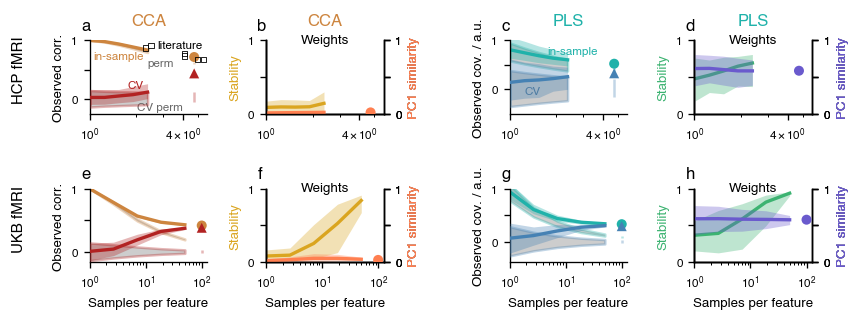

In [15]:
def set_axis_position(plot, element):
    ax = plot.handles['axis']
    bbox = ax.get_position()

    if bbox.x0 < .15:
        x0 = .05
    elif bbox.x0 < .35:
        x0 = .26
    elif bbox.x0 < .65:
        x0 = .55
    else:
        x0 = .77
        
    ax.set_position((x0, bbox.y0, .14, .28))
    
plotted_data = {}
fig = (
    # --- HCP fMRI ---
    (
        plot_assocs_w_perm(hcp_fMRI_cca_analyses, cv=('corrs', 'kfold5'), y_label='Observed corr.', 
                           color=clr_cca, color_perm=clr_cca2, pvalue_deltay=.15, plotted_data=plotted_data, panel_label='HCP_CCA_observedCorr'
        ).opts(opts.Area(show_legend=False))
        * hv.Scatter(literature_markers, label='literature').opts(marker='s', color='None', edgecolor='black', linewidth=.5, s=10)
        * hv.Text(550/200, .925, 'literature', halign='left', valign='center', fontsize=7)
        * hv.Text(210/200, .82, 'in-sample', fontsize=7, halign='left', valign='top').opts(color=clr_cca)
        * hv.Text(700/200, .7, 'perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
        * hv.Text(450/200, .325, 'CV', fontsize=7, halign='right', valign='top').opts(color=clr_cca2)
        * hv.Text(800/200, -.05, 'CV perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
    ).opts(
        xlim=(1, 5.75), xlabel='', ylim=(None, 1), yticks=[0, 0.5, 1], legend_position='top_left', show_legend=False,
        hooks=[set_axis_position, Sup_ylabel('HCP fMRI', y=.6), legend_frame_off, suptitle_cca, 
               Format_log_axis('x', (1, 4)), yticks]
    )
    + (
        plot_weight_cossims_n(hcp_fMRI_cca_analyses, clr_cca4, plotted_data=plotted_data, panel_label='HCP_CCA_weightStability')
        * plot_weight_pc_similarity(hcp_fMRI_cca_analyses, clr_cca3, plotted_data=plotted_data, panel_label='HCP_CCA_weightPCSimilarity').opts(show_legend=True)
    ).opts(xlim=(1, 5.75), xlabel='', ylim=(0, 1), yticks=[0, 0.5, 1], 
           hooks=[set_axis_position, ylabel_clr_cca, legend_frame_off, suptitle_cca, Format_log_axis('x', (1, 4)), Suptitle('Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
    #
    + (
        plot_assocs_w_perm(hcp_fMRI_pls_analyses, cv=('covs', 'kfold5'), y_scale=1./.3, y_label='Observed cov. / a.u.', color=clr_pls, color_perm=clr_pls2, plotted_data=plotted_data, panel_label='HCP_PLS_observedCorr')
        * hv.Text(350/200, .875, 'in-sample', fontsize=7, halign='left', valign='top').opts(color=clr_pls)
        # * hv.Text(700/200, .7, 'perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
        * hv.Text(250/200, .075, 'CV', fontsize=7, halign='left', valign='top').opts(color=clr_pls2)
        # * hv.Text(700/200, -.1, 'CV perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
    ).opts(
        xlim=(1, 5.75), xlabel='', ylim=(None, 1.), yticks=[0, 0.5, 1], ylabel='Observed cov. / a.u.', show_legend=False, legend_position='bottom_left',  #sublabel_position=(-.66, .9),
        hooks=[set_axis_position, legend_frame_off, suptitle_pls, Format_log_axis('x', (1, 4)), yticks])
    + (
        plot_weight_cossims_n(hcp_fMRI_pls_analyses, clr_pls4, plotted_data=plotted_data, panel_label='HCP_PLS_weightStability')
        * plot_weight_pc_similarity(hcp_fMRI_pls_analyses, clr_pls3, plotted_data=plotted_data, panel_label='HCP_PLS_weightPCSimilarity').opts(show_legend=True)
    ).opts(
        xlim=(1, 5.75), xlabel='', yticks=[0, 0.5, 1], ylim=(0, 1), legend_position='bottom_right',
        hooks=[set_axis_position, ylabel_clr_pls, legend_frame_off, suptitle_pls, Format_log_axis('x', (1, 4)), Suptitle('Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks]
    )
    # -----------------
    # --- UKB fMRI ---
    # -----------------
    + plot_assocs_w_perm(
        ukb_fMRI_cca_analyses, cv=('corrs', 'kfold5'), y_label='Observed corr.', color=clr_cca, color_perm=clr_cca2, plotted_data=plotted_data, panel_label='UKB_CCA_observedCorr'
    ).opts(
        xlabel='Samples per feature', xlim=(1, 125), ylim=(None, 1), yticks=[0, 0.5, 1], show_legend=False,
        hooks=[Sup_ylabel('UKB fMRI', y=.6), set_axis_position, Format_log_axis('x', major_numticks=4, minor_numticks=9), yticks]
    )
    + (
        plot_weight_cossims_n(ukb_fMRI_cca_analyses, clr_cca4, plotted_data=plotted_data, panel_label='UKB_CCA_weightStability')
        * plot_weight_pc_similarity(ukb_fMRI_cca_analyses, clr_cca3, plotted_data=plotted_data, panel_label='UKB_CCA_weightPCSimilarity').opts(show_legend=True)
    ).opts(
        xlabel='Samples per feature', xlim=(1, 125), ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False,
        hooks=[set_axis_position, ylabel_clr_cca, Format_log_axis('x', major_numticks=4, minor_numticks=9), Suptitle('Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks]
    )
    #
    + plot_assocs_w_perm(
        ukb_fMRI_pls_analyses, cv=('covs', 'kfold5'), y_scale=1./.375, y_label='Observed cov. / a.u.', color=clr_pls, color_perm=clr_pls2, plotted_data=plotted_data, panel_label='UKB_PLS_observedCorr'
    ).opts(
        xlabel='Samples per feature', xlim=(1, 125), ylim=(None, 1), ylabel='Observed cov. / a.u.', show_legend=False, #sublabel_position=(-.66, .9),
        hooks=[set_axis_position, Format_log_axis('x', major_numticks=4, minor_numticks=9), yticks]
    )
    + (
        plot_weight_cossims_n(ukb_fMRI_pls_analyses, clr_pls4, plotted_data=plotted_data, panel_label='UKB_PLS_weightStability')
        * plot_weight_pc_similarity(ukb_fMRI_pls_analyses, clr_pls3, plotted_data=plotted_data, panel_label='UKB_PLS_weightPCSimilarity').opts(show_legend=True)
    ).opts(
        xlabel='Samples per feature', xlim=(1, 125), yticks=[0, 0.5, 1], ylim=(0, 1), xaxis='bottom', show_legend=False, 
        hooks=[set_axis_position, ylabel_clr_pls, Format_log_axis('x', major_numticks=4, minor_numticks=9), Suptitle('Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks]
    )
).cols(
    4
).opts(*fig_opts).opts(
    opts.Overlay(logx=True, logy=False),
    opts.Layout(fig_inches=(7, 4.), sublabel_position=(-.2, .9), vspace=.7)
)

hv.save(fig, 'fig/fig4_empirical_data_analysis.pdf')
save_source_data(plotted_data, 'fig5')

fig

:Layout
   .Overlay.I    :Overlay
      .Area.Perm          :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Data          :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.I            :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.I        :ErrorBars   [Samples per feature]   (Observed corr.,yerrneg,yerrpos)
      .Scatter.I          :Scatter   [Samples per feature]   (Observed corr.)
      .Area.I             :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Cv            :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.II           :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.II       :ErrorBars   [Samples per feature]   (Observed corr.,yerrneg,yerrpos)
      .Scatter.II         :Scatter   [Samples per feature]   (Observed corr.)
      .Scatter.Literature :Scatter   [x]   (y)
      .Text.I             :Text   [x,y]
      .Text.II            :Text   [x,y]
      .Text.III           :Text   [x,y]
      .Text.IV            :Text   [x,y]
      .Text.V             :Text   [x,y]
   .Overlay.II   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.III  :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Data    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.I      :Curve   [Samples per feature]   (Observed cov. / a.u.)
      .ErrorBars.I  :ErrorBars   [Samples per feature]   (Observed cov. / a.u.,yerrneg,yerrpos)
      .Scatter.I    :Scatter   [Samples per feature]   (Observed cov. / a.u.)
      .Area.I       :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Cv      :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.II     :Curve   [Samples per feature]   (Observed cov. / a.u.)
      .ErrorBars.II :ErrorBars   [Samples per feature]   (Observed cov. / a.u.,yerrneg,yerrpos)
      .Scatter.II   :Scatter   [Samples per feature]   (Observed cov. / a.u.)
      .Text.I       :Text   [x,y]
      .Text.II      :Text   [x,y]
   .Overlay.IV   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.V    :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.VI   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.VII  :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.VIII :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature
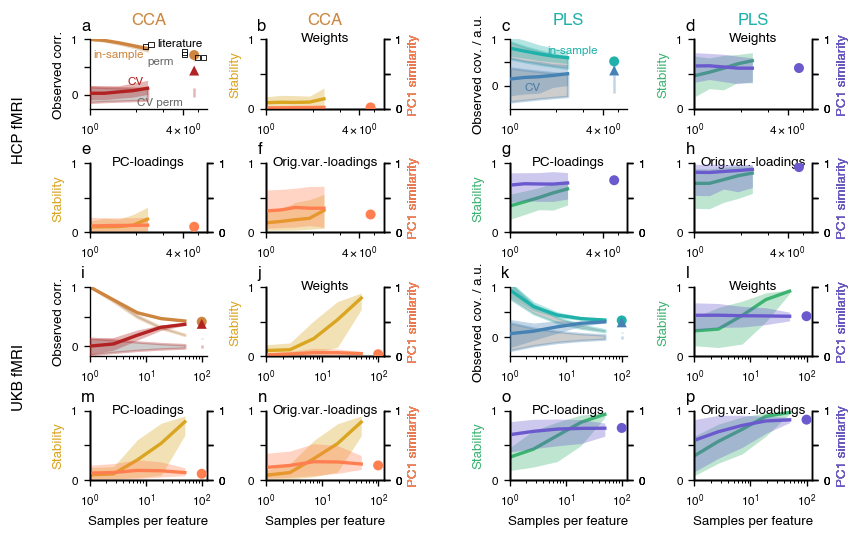

In [16]:
def set_axis_position(plot, element):
    ax = plot.handles['axis']
    bbox = ax.get_position()

    if bbox.x0 < .15:
        x0 = .05
    elif bbox.x0 < .35:
        x0 = .26
    elif bbox.x0 < .65:
        x0 = .55
    else:
        x0 = .77
        
    if bbox.y0 < .1:
        y0 = .05
    elif bbox.y0 < .35:
        y0 = .05 + .25
    elif bbox.y0 < .6:
        y0 = .05 + .5
    else:
        y0 = .05 + .75
        
    ax.set_position((x0, y0, .14, .14))
    
    
fig = (
    # --- HCP fMRI ---
    (
        plot_assocs_w_perm(hcp_fMRI_cca_analyses, cv=('corrs', 'kfold5'), y_label='Observed corr.', 
                           color=clr_cca, color_perm=clr_cca2, pvalue_deltay=.15).opts(opts.Area(show_legend=False))
        * hv.Scatter(literature_markers, label='literature').opts(marker='s', color='None', edgecolor='black', linewidth=.5, s=10)
        * hv.Text(550/200, .925, 'literature', halign='left', valign='center', fontsize=7)
        * hv.Text(210/200, .82, 'in-sample', fontsize=7, halign='left', valign='top').opts(color=clr_cca)
        * hv.Text(700/200, .7, 'perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
        * hv.Text(450/200, .325, 'CV', fontsize=7, halign='right', valign='top').opts(color=clr_cca2)
        * hv.Text(800/200, -.05, 'CV perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
    ).opts(
        xlim=(1, 5.75), xlabel='', ylim=(None, 1), yticks=[0, 0.5, 1], legend_position='top_left', show_legend=False,
        hooks=[set_axis_position, Sup_ylabel('HCP fMRI', y=-.3), legend_frame_off, suptitle_cca, 
               Format_log_axis('x', (1, 4)), yticks]
    )
    + (
        plot_weight_cossims_n(hcp_fMRI_cca_analyses, clr_cca4)
        * plot_weight_pc_similarity(hcp_fMRI_cca_analyses, clr_cca3).opts(show_legend=True)
    ).opts(xlim=(1, 5.75), xlabel='', ylim=(0, 1), yticks=[0, 0.5, 1], 
           hooks=[set_axis_position, ylabel_clr_cca, legend_frame_off, suptitle_cca, Format_log_axis('x', (1, 4)), Suptitle('Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
    #
    + (
        plot_assocs_w_perm(hcp_fMRI_pls_analyses, cv=('covs', 'kfold5'), y_scale=1./.3, y_label='Observed cov. / a.u.', color=clr_pls, color_perm=clr_pls2)
        * hv.Text(350/200, .875, 'in-sample', fontsize=7, halign='left', valign='top').opts(color=clr_pls)
        # * hv.Text(700/200, .7, 'perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
        * hv.Text(250/200, .075, 'CV', fontsize=7, halign='left', valign='top').opts(color=clr_pls2)
        # * hv.Text(700/200, -.1, 'CV perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
    ).opts(
        xlim=(1, 5.75), xlabel='', ylim=(None, 1.), yticks=[0, 0.5, 1], ylabel='Observed cov. / a.u.', show_legend=False, legend_position='bottom_left',  #sublabel_position=(-.66, .9),
        hooks=[set_axis_position, legend_frame_off, suptitle_pls, Format_log_axis('x', (1, 4)), yticks])
    + (
        plot_weight_cossims_n(hcp_fMRI_pls_analyses, clr_pls4)
        * plot_weight_pc_similarity(hcp_fMRI_pls_analyses, clr_pls3).opts(show_legend=True)
    ).opts(
        xlim=(1, 5.75), xlabel='', yticks=[0, 0.5, 1], ylim=(0, 1), legend_position='bottom_right',
        hooks=[set_axis_position, ylabel_clr_pls, legend_frame_off, suptitle_pls, Format_log_axis('x', (1, 4)), Suptitle('Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks]
    )
    # ----------------------
    # --- HCP fMRI row 2 ---
    # ----------------------
    + (
        plot_loadings_pearsonsims_n(hcp_fMRI_cca_analyses, clr_cca4)
        * plot_loadings_pc_similarity(hcp_fMRI_cca_analyses, clr_cca3, show_ylabel='')
    ).opts(xlabel='', xlim=(1, 5.75), ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, ylabel_clr_cca, Format_log_axis('x', (1, 4)), Suptitle('PC-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
    + (
        plot_orig_loadings_pearsonsims_n(hcp_fMRI_cca_analyses, clr_cca4)
        * plot_orig_loadings_pc_similarity(hcp_fMRI_cca_analyses, clr_cca3)
    ).opts(xlabel='', ylabel='', xlim=(1, 5.75), ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, Format_log_axis('x', (1, 4)), Suptitle('Orig.var.-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
    + (
        plot_loadings_pearsonsims_n(hcp_fMRI_pls_analyses, clr_pls4)
        * plot_loadings_pc_similarity(hcp_fMRI_pls_analyses, clr_pls3, show_ylabel='')
    ).opts(xlabel='', xlim=(1, 5.75), ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, ylabel_clr_pls, Format_log_axis('x', (1, 4)), Suptitle('PC-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
    + (
        plot_orig_loadings_pearsonsims_n(hcp_fMRI_pls_analyses, clr_pls4)
        * plot_orig_loadings_pc_similarity(hcp_fMRI_pls_analyses, clr_pls3)
    ).opts(xlabel='', ylabel='', xlim=(1, 5.75), ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, Format_log_axis('x', (1, 4)), Suptitle('Orig.var.-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
    # -----------------
    # --- UKB fMRI ---
    # -----------------
    + plot_assocs_w_perm(ukb_fMRI_cca_analyses, cv=('corrs', 'kfold5'), y_label='Observed corr.', color=clr_cca, color_perm=clr_cca2).opts(
        xlabel='', xlim=(1, 125), ylim=(None, 1), yticks=[0, 0.5, 1], show_legend=False,
        hooks=[Sup_ylabel('UKB fMRI', y=-.3), set_axis_position, Format_log_axis('x', major_numticks=4, minor_numticks=9), yticks]
    )
    + (
        plot_weight_cossims_n(ukb_fMRI_cca_analyses, clr_cca4)
        * plot_weight_pc_similarity(ukb_fMRI_cca_analyses, clr_cca3).opts(show_legend=True)
    ).opts(
        xlabel='', xlim=(1, 125), ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False,
        hooks=[set_axis_position, ylabel_clr_cca, Format_log_axis('x', major_numticks=4, minor_numticks=9), Suptitle('Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks]
    )
    #
    + plot_assocs_w_perm(ukb_fMRI_pls_analyses, cv=('covs', 'kfold5'), y_scale=1./.375, 
                         y_label='Observed cov. / a.u.', color=clr_pls, color_perm=clr_pls2).opts(
        xlabel='', xlim=(1, 125), ylim=(None, 1), ylabel='Observed cov. / a.u.', show_legend=False, #sublabel_position=(-.66, .9),
        hooks=[set_axis_position, Format_log_axis('x', major_numticks=4, minor_numticks=9), yticks]
    )
    + (
        plot_weight_cossims_n(ukb_fMRI_pls_analyses, clr_pls4)
        * plot_weight_pc_similarity(ukb_fMRI_pls_analyses, clr_pls3).opts(show_legend=True)
    ).opts(
        xlabel='', xlim=(1, 125), yticks=[0, 0.5, 1], ylim=(0, 1), xaxis='bottom', show_legend=False, 
        hooks=[set_axis_position, ylabel_clr_pls, Format_log_axis('x', major_numticks=4, minor_numticks=9), Suptitle('Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks]
    )
    # ----------------------
    # --- UKB fMRI row 2 ---
    # ----------------------
    + (
        plot_loadings_pearsonsims_n(ukb_fMRI_cca_analyses, clr_cca4)
        * plot_loadings_pc_similarity(ukb_fMRI_cca_analyses, clr_cca3, show_ylabel='')
    ).opts(xlim=(1, 125), ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, ylabel_clr_cca, Format_log_axis('x', major_numticks=4, minor_numticks=9), Suptitle('PC-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
    + (
        plot_orig_loadings_pearsonsims_n(ukb_fMRI_cca_analyses, clr_cca4)
        * plot_orig_loadings_pc_similarity(ukb_fMRI_cca_analyses, clr_cca3)
    ).opts(ylabel='', xlim=(1, 125), ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, Format_log_axis('x', major_numticks=4, minor_numticks=9), Suptitle('Orig.var.-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
    + (
        plot_loadings_pearsonsims_n(ukb_fMRI_pls_analyses, clr_pls4)
        * plot_loadings_pc_similarity(ukb_fMRI_pls_analyses, clr_pls3, show_ylabel='')
    ).opts(xlim=(1, 125), ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, ylabel_clr_pls, Format_log_axis('x', major_numticks=4, minor_numticks=9), Suptitle('PC-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
    + (
        plot_orig_loadings_pearsonsims_n(ukb_fMRI_pls_analyses, clr_pls4)
        * plot_orig_loadings_pc_similarity(ukb_fMRI_pls_analyses, clr_pls3)
    ).opts(ylabel='', xlim=(1, 125), ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, Format_log_axis('x', major_numticks=4, minor_numticks=9), Suptitle('Orig.var.-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
).cols(
    4
).opts(*fig_opts).opts(
    opts.Overlay(logx=True, logy=False),
    opts.Layout(fig_inches=(7, 6.5), sublabel_position=(-.2, .875), vspace=1.6)
)

hv.save(fig, 'fig/fig4_empirical_data_analysis_all.pdf')

fig

In [17]:
print(float(hcp_fMRI_cca_analyses['full_sample']['p_value']), float(hcp_fMRI_pls_analyses['full_sample']['p_value']))
print(float(ukb_fMRI_cca_analyses['full_sample']['p_value']), float(ukb_fMRI_pls_analyses['full_sample']['p_value']))

0.000999000999000999 0.002997002997002997
0.000999000999000999 0.000999000999000999


## Supplementary figure: plot X and Y separately

In [18]:
def set_axis_position(plot, element):
    ax = plot.handles['axis']
    bbox = ax.get_position()

    if bbox.x0 < .15:
        x0 = .05
    elif bbox.x0 < .35:
        x0 = .26
    elif bbox.x0 < .65:
        x0 = .55
    else:
        x0 = .77
        
    y0 = bbox.y0
        
    ax.set_position((x0, y0, .14, .14))


def plt_xy(cca_analyses, pls_analyses, max_x=5.75):
    return (
        # --- Weights ---
        (
            plot_weight_cossims_n(cca_analyses, clr_cca4, modality='X')
            * plot_weight_pc_similarity(cca_analyses, clr_cca3, show_ylabel='', modality='X').opts(show_legend=True)
        ).opts(xlabel='', ylim=(0, 1), yticks=[0, 0.5, 1], 
            hooks=[set_axis_position, ylabel_clr_cca, legend_frame_off, suptitle_cca, Format_log_axis('x', (1, 4)), Suptitle('$X$ Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
        + (
            plot_weight_cossims_n(cca_analyses, clr_cca4, modality='Y')
            * plot_weight_pc_similarity(cca_analyses, clr_cca3, modality='Y').opts(show_legend=True)
        ).opts(xlabel='', ylabel='', ylim=(0, 1), yticks=[0, 0.5, 1], 
            hooks=[set_axis_position, ylabel_clr_cca, legend_frame_off, suptitle_cca, Format_log_axis('x', (1, 4)), Suptitle('$Y$ Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
        + (
            plot_weight_cossims_n(pls_analyses, clr_pls4, modality='X')
            * plot_weight_pc_similarity(pls_analyses, clr_pls3, show_ylabel='', modality='X').opts(show_legend=True)
        ).opts(
            xlabel='', yticks=[0, 0.5, 1], ylim=(0, 1), legend_position='bottom_right',
            hooks=[set_axis_position, ylabel_clr_pls, legend_frame_off, suptitle_pls, Format_log_axis('x', (1, 4)), Suptitle('$X$ Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks]
        )
        + (
            plot_weight_cossims_n(pls_analyses, clr_pls4, modality='Y')
            * plot_weight_pc_similarity(pls_analyses, clr_pls3, modality='Y').opts(show_legend=True)
        ).opts(
            xlabel='', ylabel='', yticks=[0, 0.5, 1], ylim=(0, 1), legend_position='bottom_right',
            hooks=[set_axis_position, ylabel_clr_pls, legend_frame_off, suptitle_pls, Format_log_axis('x', (1, 4)), Suptitle('$Y$ Weights', 'black', y=.925, fontsize=8, fontweight='normal'), yticks]
        )
        # --- PC-loadings ---
        + (
            plot_loadings_pearsonsims_n(cca_analyses, clr_cca4, modality='X')
            * plot_loadings_pc_similarity(cca_analyses, clr_cca3, show_ylabel='', modality='X')
        ).opts(xlabel='', ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, ylabel_clr_cca, Format_log_axis('x', (1, 4)), Suptitle('$X$ PC-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
        + (
            plot_loadings_pearsonsims_n(cca_analyses, clr_cca4, modality='Y')
            * plot_loadings_pc_similarity(cca_analyses, clr_cca3, modality='Y')
        ).opts(xlabel='', ylabel='', ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, ylabel_clr_cca, Format_log_axis('x', (1, 4)), Suptitle('$Y$ PC-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
        + (
            plot_loadings_pearsonsims_n(pls_analyses, clr_pls4, modality='X')
            * plot_loadings_pc_similarity(pls_analyses, clr_pls3, show_ylabel='', modality='X')
        ).opts(xlabel='', ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, ylabel_clr_pls, Format_log_axis('x', (1, 4)), Suptitle('$X$ PC-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
        + (
            plot_loadings_pearsonsims_n(pls_analyses, clr_pls4, modality='Y')
            * plot_loadings_pc_similarity(pls_analyses, clr_pls3, modality='Y')
        ).opts(xlabel='', ylabel='', ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, ylabel_clr_pls, Format_log_axis('x', (1, 4)), Suptitle('$Y$ PC-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
        # --- Orig-loadings ---
        + (
            plot_orig_loadings_pearsonsims_n(cca_analyses, clr_cca4, modality='X')
            * plot_orig_loadings_pc_similarity(cca_analyses, clr_cca3, show_ylabel='', modality='X')
        ).opts(ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, ylabel_clr_cca, Format_log_axis('x', (1, 4)), Suptitle('$X$ Orig.var.-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
        + (
            plot_orig_loadings_pearsonsims_n(cca_analyses, clr_cca4, modality='Y')
            * plot_orig_loadings_pc_similarity(cca_analyses, clr_cca3, modality='Y')
        ).opts(ylabel='', ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, Format_log_axis('x', (1, 4)), Suptitle('$Y$ Orig.var.-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
        + (
            plot_orig_loadings_pearsonsims_n(pls_analyses, clr_pls4, modality='X')
            * plot_orig_loadings_pc_similarity(pls_analyses, clr_pls3, show_ylabel='', modality='X')
        ).opts(ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, ylabel_clr_pls, Format_log_axis('x', (1, 4)), Suptitle('$X$ Orig.var.-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])
        + (
            plot_orig_loadings_pearsonsims_n(pls_analyses, clr_pls4, modality='Y')
            * plot_orig_loadings_pc_similarity(pls_analyses, clr_pls3, modality='Y')
        ).opts(ylabel='', ylim=(0, 1), yticks=[0, 0.5, 1], show_legend=False, hooks=[set_axis_position, Format_log_axis('x', (1, 4)), Suptitle('$Y$ Orig.var.-loadings', 'black', y=.925, fontsize=8, fontweight='normal'), yticks])

    ).cols(
        4
    ).opts(*fig_opts).opts(
        opts.Overlay(logx=True, logy=False, xlim=(1, max_x)),
        opts.Layout(fig_inches=(7, 12), sublabel_position=(-.2, .95), vspace=1)
    )

:Layout
   .Overlay.I    :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.II   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.III  :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.IV   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.V    :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.VI   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.VII  :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.VIII :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.IX   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.X    :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.XI   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.XII  :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
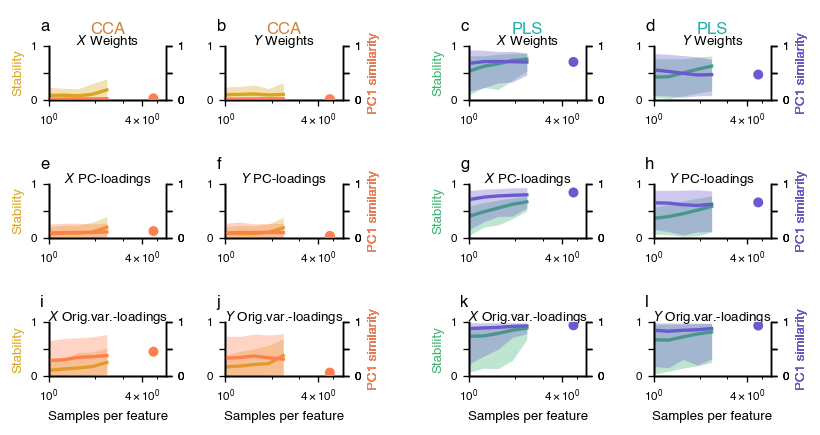

In [19]:
fig_hcp_fmri_xy = plt_xy(hcp_fMRI_cca_analyses, hcp_fMRI_pls_analyses, max_x=5.75)
hv.save(fig_hcp_fmri_xy, 'fig/figS_empirical_hcp_fmri_xy.pdf')
fig_hcp_fmri_xy

:Layout
   .Overlay.I    :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.II   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.III  :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.IV   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.V    :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.VI   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.VII  :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.VIII :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.IX   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.X    :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.XI   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.XII  :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
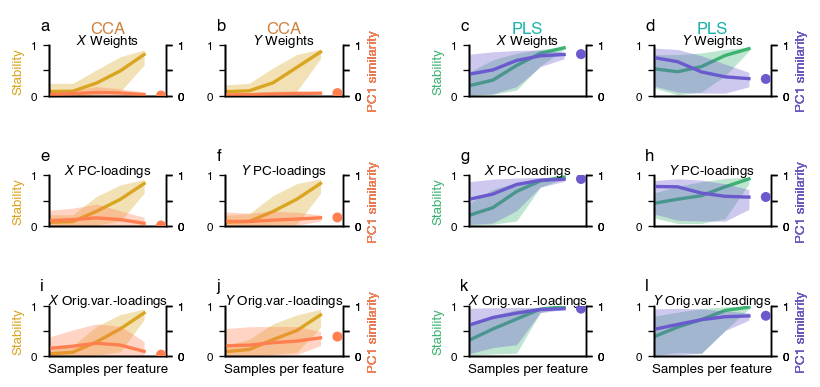

In [20]:
fig_ukb_fmri_xy = plt_xy(ukb_fMRI_cca_analyses, ukb_fMRI_pls_analyses, max_x=125)
hv.save(fig_ukb_fmri_xy, 'fig/figS_empirical_ukb_fmri_xy.pdf')
fig_ukb_fmri_xy

## Supplementary figure: dMRI & optiNpcs

:Layout
   .Overlay.I    :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Data    :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.I      :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.I  :ErrorBars   [Samples per feature]   (Observed corr.,yerrneg,yerrpos)
      .Scatter.I    :Scatter   [Samples per feature]   (Observed corr.)
      .Area.I       :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Cv      :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.II     :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.II :ErrorBars   [Samples per feature]   (Observed corr.,yerrneg,yerrpos)
      .Scatter.II   :Scatter   [Samples per feature]   (Observed corr.)
   .Overlay.II   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.III  :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Data    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.I      :Curve   [Samples per feature]   (Observed cov. / a.u.)
      .ErrorBars.I  :ErrorBars   [Samples per feature]   (Observed cov. / a.u.,yerrneg,yerrpos)
      .Scatter.I    :Scatter   [Samples per feature]   (Observed cov. / a.u.)
      .Area.I       :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Cv      :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.II     :Curve   [Samples per feature]   (Observed cov. / a.u.)
      .ErrorBars.II :ErrorBars   [Samples per feature]   (Observed cov. / a.u.,yerrneg,yerrpos)
      .Scatter.II   :Scatter   [Samples per feature]   (Observed cov. / a.u.)
   .Overlay.IV   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.V    :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Data    :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.I      :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.I  :ErrorBars   [Samples per feature]   (Observed corr.,yerrneg,yerrpos)
      .Scatter.I    :Scatter   [Samples per feature]   (Observed corr.)
      .Area.I       :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Area.Cv      :Area   [Samples per feature]   (Observed corr.,Observed corr.2)
      .Curve.II     :Curve   [Samples per feature]   (Observed corr.)
      .ErrorBars.II :ErrorBars   [Samples per feature]   (Observed corr.,yerrneg,yerrpos)
      .Scatter.II   :Scatter   [Samples per feature]   (Observed corr.)
      .Text.I       :Text   [x,y]
      .Text.II      :Text   [x,y]
      .Text.III     :Text   [x,y]
      .Text.IV      :Text   [x,y]
   .Overlay.VI   :Overlay
      .Area.I     :Area   [Samples per feature]   (stability,y2)
      .Curve.I    :Curve   [Samples per feature]   (stability)
      .Area.II    :Area   [Samples per feature]   (y,y2)
      .Curve.Data :Curve   [Samples per feature]   (y)
      .Scatter.I  :Scatter   [Samples per feature]   (y)
   .Overlay.VII  :Overlay
      .Area.Perm    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Area.Data    :Area   [Samples per feature]   (Observed cov. / a.u.,Observed cov. / a.u.2)
      .Curve.I      :Curve   [Samples per feature]   (Observed cov. / a.u.)
      .ErrorBars.
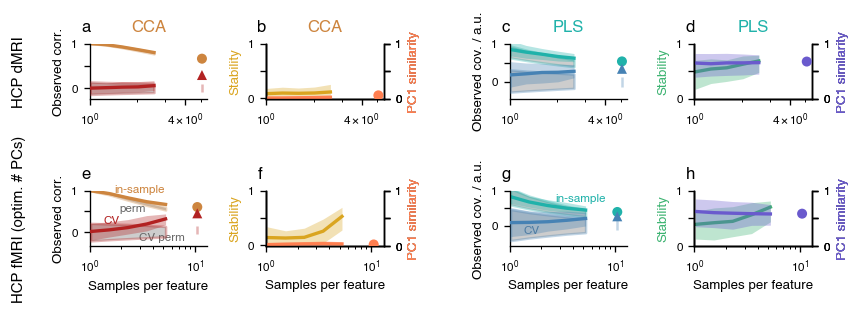

In [21]:
def set_axis_position(plot, element):
    ax = plot.handles['axis']
    bbox = ax.get_position()
    
    if bbox.x0 < .1:
        x0 = .05
    elif bbox.x0 < .35:
        x0 = .26
    elif bbox.x0 < .6:
        x0 = .55
    else:
        x0 = .77
        
    ax.set_position((x0, bbox.y0, .14, .225))
            
    
fig = (
    # ----------------
    # --- HCP dMRI ---
    # ----------------
    plot_assocs_w_perm(hcp_dMRI_cca_analyses, cv=('corrs', 'kfold5'), y_label='Observed corr.', 
                         color=clr_cca, color_perm=clr_cca2, pvalue_deltay=.1).opts(
        xlim=(1 , 5.5), xlabel='', ylim=(None, 1), yticks=7, show_legend=False,
        hooks=[suptitle_cca, Sup_ylabel('HCP dMRI'), set_axis_position, Format_log_axis('x', (1, 4)), yticks]
    )
    + (
        plot_weight_cossims_n(hcp_dMRI_cca_analyses, clr_cca4)
        * plot_weight_pc_similarity(hcp_dMRI_cca_analyses, clr_cca3).opts(show_legend=True)
    ).opts(
        xlim=(1, 5.5), xlabel='', ylim=(-.01, 1), yticks=6, show_legend=False,
        hooks=[suptitle_cca, set_axis_position, ylabel_clr_cca, Format_log_axis('x', (1, 4)), yticks]
    )
    #
    + plot_assocs_w_perm(hcp_dMRI_pls_analyses, cv=('covs', 'kfold5'), y_scale=3., y_label='Observed cov. / a.u.', color=clr_pls, color_perm=clr_pls2).opts(
        xlim=(1, 5.5), xlabel='', ylim=(None, 1), ylabel='Observed cov. / a.u.', show_legend=False, 
        hooks=[suptitle_pls, set_axis_position, Format_log_axis('x', (1, 4)), yticks]
    )
    + (
        plot_weight_cossims_n(hcp_dMRI_pls_analyses, clr_pls4)
        * plot_weight_pc_similarity(hcp_dMRI_pls_analyses, clr_pls3).opts(show_legend=True)
    ).opts(
        xlim=(1, 5.5), xlabel='', yticks=6, ylim=(0, 1.0), show_legend=False,
        hooks=[suptitle_pls, set_axis_position, ylabel_clr_pls, Format_log_axis('x', (1, 4)), yticks]
    )
    # ---------------------------------
    # --- HCP fMRI (optimized nPCs) ---
    # ---------------------------------
    +  (
        plot_assocs_w_perm(hcp_fMRI_optiNpcs_cca_analyses, cv=('corrs', 'kfold5'), y_label='Observed corr.', color=clr_cca, 
                        color_perm=clr_cca2, show_pvalue=False)
        * hv.Text(150/88, .92, 'in-sample', fontsize=7, halign='left', valign='bottom').opts(color=clr_cca)
        * hv.Text(300/88, .7, 'perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
        * hv.Text(170/88, .165, 'CV', fontsize=7, halign='right', valign='bottom').opts(color=clr_cca2)
        * hv.Text(700/88, -.015, 'CV perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
    ).opts(
        xlim=(1, 1150/88), ylim=(None, 1), yticks=7, show_legend=False, 
        hooks=[Sup_ylabel('HCP fMRI (optim. # PCs)'), set_axis_position, Labelpos('x', 4), Format_log_axis('x'), yticks]
    )
    + (
        plot_weight_cossims_n(hcp_fMRI_optiNpcs_cca_analyses, clr_cca4)
        * plot_weight_pc_similarity(hcp_fMRI_optiNpcs_cca_analyses, clr_cca3).opts(show_legend=True)
    ).opts(
        xlim=(1, 1150/88), ylim=(-.01, 1), yticks=6, show_legend=False,
        hooks=[set_axis_position, ylabel_clr_cca, Labelpos('x', 3), Format_log_axis('x'), yticks]
    )
    #
    + (
        plot_assocs_w_perm(hcp_fMRI_optiNpcs_pls_analyses, cv=('covs', 'kfold5'), y_scale=1./.375, y_label='Observed cov. / a.u.', 
                            color=clr_pls, color_perm=clr_pls2, show_pvalue=False)
        * hv.Text(240/88, .925, 'in-sample', fontsize=7, halign='left', valign='top').opts(color=clr_pls)
        # * hv.Text(700, .7, 'perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
        * hv.Text(120/88, 0, 'CV', fontsize=7, halign='left', valign='top').opts(color=clr_pls2)
        # * hv.Text(700, -.1, 'CV perm', fontsize=7, halign='right', valign='top').opts(color=clr_perm1)
    ).opts(
        xlim=(1, 1150/88), ylim=(None, 1), ylabel='Observed cov. / a.u.', show_legend=False,
        hooks=[set_axis_position, Labelpos('x', 3), Format_log_axis('x'), yticks]
    )
    + (
        plot_weight_cossims_n(hcp_fMRI_optiNpcs_pls_analyses, clr_pls4)
        * plot_weight_pc_similarity(hcp_fMRI_optiNpcs_pls_analyses, clr_pls3).opts(show_legend=True)
    ).opts(
        xlim=(1, 1150/88), show_legend=False, yticks=6, ylim=(0, 1), xaxis='bottom',
        hooks=[set_axis_position, ylabel_clr_pls, Labelpos('x', 3), Format_log_axis('x'), yticks]
    )
).cols(
    4
).opts(*fig_opts).opts(
    opts.Overlay(logx=True, logy=False),
    opts.Layout(fig_inches=(7, 2.5), sublabel_position=(-.2, .9), vspace=1.)
)

hv.save(fig, 'fig/figS_empirical.pdf')

fig

In [22]:
print(float(hcp_dMRI_cca_analyses['full_sample']['p_value']), float(hcp_dMRI_pls_analyses['full_sample']['p_value']))
print(float(hcp_fMRI_optiNpcs_cca_analyses['full_sample']['p_value']), float(hcp_fMRI_optiNpcs_pls_analyses['full_sample']['p_value']))

0.000999000999000999 0.000999000999000999
0.000999000999000999 0.003996003996003996
